# Proyecto

## Espacio Muestral
Un espacio muestral asociado a un experimento es el conjunto de formado por todos los posibles puntos muestrales. Los espacios muestrales generalmente se denotan con la letra S.

In [1]:
S1 <- c('cara', 'escudo')
#Este código genera un espacio muestral para el lanzamiento de una moneda
S2 <- 1:6
#Este código genera un espacio muestral para el lanzamiento de un dado

moneda <- c('cara', 'escudo')

S3 <- expand.grid(moneda, moneda)
colnames(S3) <- c('Moneda 1', 'Moneda 2')
S3
#Este código genera un espacio muestral con la combinación del #lanzamiento de dos monedas

Moneda 1,Moneda 2
cara,cara
escudo,cara
cara,escudo
escudo,escudo


## Eventos
Un evento es un subconjunto de sucesos o puntos muestrales dentro del Espacio Muestral.

In [2]:
dado <- 1:6
#inicializamos los dados
#creamos un espacio muestral con la combinación de los dados 1 y dados 2
Sdados <- expand.grid(dado, dado)
colnames(Sdados) <- c('Dado1', 'Dado2')
#A Continuación vamos crear un evento o conjunto de puntos muestrales donde la suma de los dos dados
#de como resultado 4"
puntos <- (Sdados$Dado1 + Sdados$Dado2) == 4
#Esto nos devuelve un arreglo con todos los puntos que cumplen el criterio como TRUE y los 
#que no cumplen como FALSE
evento <- Sdados[puntos,]
#Finalmente para generar el evento debemos extraer del espacio muestral los eventos que cumplieron
#con la condición anterior
evento

,Dado1,Dado2
3,3,1
8,2,2
13,1,3


Como vemos el resultado está compuesto por los valores del dado 1 y el dado 2 que dan 4 así como los índices dentro del espacio muestral donde estos eventos fueron registrados.

## Algebra de Conjuntos

El álgebra de conjuntos es una poderosa herramienta para analizar y delimitar espacios muestrales y eventos.

### Union
La unión de conjuntos consiste en los elementos de un evento A con los elementos de evento B para formar un nuevo conjunto.

In [16]:
dado <- 1:6
#inicializamos los dados
#creamos un espacio muestral con la combinación de los dados 1 y dados 2
Sdados <- expand.grid(dado, dado)
colnames(Sdados) <- c('Dado1', 'Dado2')
#Del espacio muestral dado por dos conjuntos, sea A un evento que la sumatoria de los dados sea igual a 4
puntos_a <- (Sdados$Dado1 + Sdados$Dado2) == 4
A <- Sdados[puntos_a,]
#Sea B un evento en donde los valores de los dados 1 y 2 son números pares
puntos_b <- (((Sdados$Dado1 %% 2) == 0) & ((Sdados$Dado2 %% 2) == 0))
B <- Sdados[puntos_b,]
#Sea C la unión de los dos conjuntos
union(A, B)

[[1]]
[1] 3 2 1

[[2]]
[1] 1 2 3

[[3]]
[1] 2 4 6 2 4 6 2 4 6

[[4]]
[1] 2 2 2 4 4 4 6 6 6

### Interseccion
La intersección de conjuntos se forma de los elementos de un evento A que existen en un evento B

In [17]:
dado <- 1:6
#inicializamos los dados
#creamos un espacio muestral con la combinación de los dados 1 y dados 2
Sdados <- expand.grid(dado, dado)
colnames(Sdados) <- c('Dado1', 'Dado2')
#Del espacio muestral dado por dos conjuntos, sea A un evento que la sumatoria de los dados sea igual a 4
puntos_a <- (Sdados$Dado1 + Sdados$Dado2) == 4
A <- Sdados[puntos_a,]
#Sea B un evento en donde los valores de los dados 1 y 2 son números pares
puntos_b <- (((Sdados$Dado1 %% 2) == 0) & ((Sdados$Dado2 %% 2) == 0))
B <- Sdados[puntos_b,]
#Utilizando los eventos previamente definidos de A y B sea D la intersección de ambos eventos
intersect(A, B)

<0 x 0 matrix>

## Probabilidad
La probabilidad es una medida de la creencia de un evento de ocurrir. En un espacio muestral S donde existe un evento A (donde A es un subconjunto de S) se dice que P(A) es la probabilidad de un evento A de ocurrir (es decir cualquiera de los puntos muestrales dentro de A de ocurrir). Donde se cumplen los siguientes axiomas:

\begin{align}
{P(A)} & \geq 0 \\
{P(s)} & = 1 \\
{P(A_1 \cup A_2 \cup A_3 \cup \dots \cup A_n)} & = \sum_{i=1}^\infty P(A_n) 
\end{align}

En resumen la probabilidad de un Evento A se puede calcular con la siguiente fórmula: 
\begin{align}
{P(A)} & = \frac{\#A}{\#B} \\
\end{align}

Donde #A es el numero de puntos muestrales en un evento A y #S es total de puntos muestrales en el espacio muestral, o mas bien la cardinalidad A dividido la cardinalidad de S.

In [20]:
#Definimos nuevamente nuestro espacio muestral siendo dos dados
dado <- 1:6
S <- expand.grid(dado, dado)
colnames(S) <- c('Dado1', 'Dado2')
#Sea un evento A definido por los valores del dado 1 y el dado 2 que son impares
puntos_a <- (((S$Dado1 %% 2) != 0) & ((S$Dado2 %% 2) != 0))
A <- S[puntos_a,]
#Utilizando el comando nrow obtenemos la cardinalidad de A
cat('cardinalidad de A: ', nrow(A))
cat('\n')
#y con el mismo comando obtenemos la cardinalidad del total del espacio muestral
cat('cardinalidad de B: ',nrow(S))
cat('\n')
#por lo tanto la sea PA la P(A)
PA <- nrow(A)/nrow(S)
cat('P(A) = ',PA)

cardinalidad de A:  9
cardinalidad de B:  36
P(A) =  0.25

## Metodos de Conteo
Ya hemos visto la definición de espacio muestral, eventos en un espacio muestral y como calcular las probabilidades, esto nos implica conocer el número de puntos muestrales dentro del espacio muestral y del evento. Existen espacios muestrales donde sus puntos son demasiado grandes, por lo que contarlos de manera tradicional resulta demasiado complicado, para ello existen los siguientes métodos de conteo.

### Permutaciones
Una permutacion de n elementos tomados de r en r es el total de diferentes arreglos ordenados de tamaño r que pueden conseguirse de un conjunto con n elementos. La formula para calcular permutaciones es:

\begin{align}
_{n}\textrm{P}_r = \frac{n!}{(n-r)!}
\end{align}

Ejemplo:
Supongamos que queremos extraer 3 bolas de billar de las 15 que existen, ¿Cuantas permutaciones distintas podemos obtener?

\begin{align}
_{15}\textrm{P}_3 & = \frac{15!}{(15-3)!} \\
_{15}\textrm{P}_3 & = 2730
\end{align}

Si realizamos el mismo ejercicio utilizando R

In [34]:
#instalamos la librería gtools utilizando el siguiente comando
install.packages('gtools')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [35]:
#Importamos la librería gtools
library(gtools)
#creamos una lista de número del 1 al 15 que representarán las bolas de billar
bolas_billar <- 1:15
#finalmente usamos el comando permutations, para hacer el cálculo, 
#nótese que este comando genera un data frame con todas las permutaciones #posibles
p_15_3 <- permutations(n=15,r=3, v=bolas_billar)
#Si únicamente queremos saber la cantidad de permutaciones utilizamos el #comando nrow para esto
nrow(p_15_3)

[1] 2730

**Nota**: al utilizar el comando permutations en R se debe tener cuidado de no generar un espacio muestral demasiado grande ya que esto tardaría demasiado en computar, ya que se calcula el listado con todas las permutaciones.

### Combinaciones
Combinación de r elementos tomados de un conjunto de tamaño n es el total de diferentes subconjuntos de tamaño r que pueden conseguirse de un conjunto con n elementos. La fórmula para calcular las combinaciones es:

\begin{aligned}
_n\textrm{C}_r = \frac{n!}{(n-r)!\times r!}
\end{aligned}

Ejemplo

Calculemos cuántas combinaciones diferentes podemos obtener de manos de poker de 5 cartas con una baraja de 52 cartas, tomando en cuenta que no importa el orden en que se saquen dichas cartas. 

In [33]:
#nuevamente utilizamos la librería gtools
library(gtools)
#y basta con generar una combinación de (52 5) de las 52 y esto nos genera el siguiente resultado
nrow(combinations(n=52,r=5,1:52))

[1] 2598960

Al ejecutar este código nos imprime que el resultado es 2,598,960, que son todas las posibles combinaciones que se pueden dar en el poker.

Ejemplo

Calcule cuántas combinaciones de poker (4 cartas del mismo tipo y cualquier carta adicional) se pueden dar en el juego de poker.


In [36]:
#importamos nuevamente la librería gtools
library(gtools)
#primero vamos a seleccionar una carta dentro de las denominaciones de As hasta K
#que son 13 cartas, la que será nuestra carta de poker
numero_de_carta <- nrow(combinations(n=13,r=1,1:13))
#de la carta anterior necesitamos los 4 tipos de cartas 
#corazón, espadas, tréboles y diamantes
tipo_de_carta <- nrow(combinations(n=4,r=4,1:4))
#luego necesitamos calcular la 5ta carta la cual seleccionamos 
#cualquier denominación de las 12 que nos quedan
#tomando en cuenta que ya seleccionamos una denominación para el poker
numero_carta_adicional <- nrow(combinations(n=12,r=1,1:12))
#y luego de esa carta adicional buscamos cualquier tipo
#ya que no nos interesa de qué tipo y denominación sea
tipo_carta_adicional <- nrow(combinations(n=4,r=1,1:4))
#finalmente el total de manos se da por la multiplicación de 
#todas las combinaciones que ya seleccionamos
total_de_manos <-numero_de_carta * tipo_de_carta * numero_carta_adicional * tipo_carta_adicional
total_de_manos
#y esto nos da 624 tipos de poker distintos

[1] 624

## Probabilidad Condicional
Esta se define como la probabilidad de que ocurra un evento ya sabiendo que un evento previo ya ha ocurrido. La ecuacion de esta probabilidad es:
\begin{align}
P(A \cap B) = P(A | B)\times P(B)
\end{align}

Lo que al final nos deja
\begin{align}
P(A | B) = \frac{P(A\cap B)}{P(B)}
\end{align}

Ejemplo

Supongamos que tenemos 2 dados y realizamos 100,000 tiros, para ello vamos a generar el siguiente código.

In [39]:
#creamos una función que genere aleatoriamente los tiros de los dados
dice <- function(no_of_rolls=1){
  #la función sample nos permite generar un listado de valores para cada posible tiro
  x <- sample(1:6, size=no_of_rolls, replace=TRUE)
  y <- sample(1:6, size=no_of_rolls, replace=TRUE)
  #finalmente utilizamos cbind para combinar los resultados del dado X y el Y en un mismo
  #dataframe
  return(cbind(x,y))
}
#seteamos el seed a este valor que nos permitirá recrear 
#el experimento
set.seed(20485)
#Generamos un data frame con cien mil tiros de los dados
rolls <- as.data.frame(dice(100000))

#vamos a importar la librería plyr para la siguiente etapa
library(plyr)
#Utilizando la función ddplyr vamos a sumarizar los tiros para 
#cada posible valor de X y Y, para ello provemos el data frame
#con cada posible valor, las filas estarán dadas por X y luego 
#indicamos el criterio a utilizar para cada columna
#en este caso la sumatoria por cada valor posible de Y
freq_table <- ddply(rolls, ~x, summarize,
                    y1=sum(y==1), y2=sum(y==2), y3= sum(y==3),
                    y4 = sum(y==4), y5=sum(y==5), y6=sum(y==6))
#Le asignamos a cada fila los nombres de x
row.names(freq_table) <- paste0('x',1:6)
#esto nos devuelve un data frame sumarizado con cada posible valor de X y Y
print('Tabla de Frecuencias')
freq_table
#para volver estos valores probabilidades procedemos a dividir cada celda
#dentro de cien mil con lo cual obtenemos una matriz de probabilidades
#para cada posible combinación de tiros
prob_table <- freq_table[,-1]/100000
print('Tabla de Probabilidades')
prob_table

[1] "Tabla de Frecuencias"


,x,y1,y2,y3,y4,y5,y6
x1,1,2754,2886,2723,2804,2762,2820
x2,2,2656,2831,2670,2803,2807,2799
x3,3,2753,2876,2745,2725,2755,2751
x4,4,2783,2800,2831,2715,2806,2771
x5,5,2830,2836,2668,2766,2729,2849
x6,6,2826,2770,2771,2747,2757,2825


[1] "Tabla de Probabilidades"


,y1,y2,y3,y4,y5,y6
x1,0.02754,0.02886,0.02723,0.02804,0.02762,0.02820
x2,0.02656,0.02831,0.02670,0.02803,0.02807,0.02799
x3,0.02753,0.02876,0.02745,0.02725,0.02755,0.02751
x4,0.02783,0.02800,0.02831,0.02715,0.02806,0.02771
x5,0.02830,0.02836,0.02668,0.02766,0.02729,0.02849
x6,0.02826,0.02770,0.02771,0.02747,0.02757,0.02825


Esta tabla nos indica las probabilidades condicionales para cada valor del dado X y Y, ahora hagamos unas cuantas validaciones:

In [42]:
#creamos una función que genere aleatoriamente los tiros de los dados
dice <- function(no_of_rolls=1){
  #la función sample nos permite generar un listado de valores para cada posible tiro
  x <- sample(1:6, size=no_of_rolls, replace=TRUE)
  y <- sample(1:6, size=no_of_rolls, replace=TRUE)
  #finalmente utilizamos cbind para combinar los resultados del dado X y el Y en un mismo
  #dataframe
  return(cbind(x,y))
}
#seteamos el seed a este valor que nos permitirá recrear 
#el experimento
set.seed(20485)
#Generamos un data frame con cien mil tiros de los dados
rolls <- as.data.frame(dice(100000))
#supongamos que queremos calcular dentro de las cien mil lanzadas cuantas
#veces cae Y=1 y X=3
evento <- rolls[rolls$y==1&rolls$x==3,]
#contamos la cantidad de filas que arrojó el experimento
print('Ocurrencias para y=1 & x=3')
nrow(evento)
#para calcular la probabilidad de ocurrencia de este evento
#lo dividimos dentro del total de ocurrencias del espacio muestral
print('Probabilidad para y=1 & x=3')
nrow(evento)/100000
#esto nos arroja 0.02734 como vemos es lo mismo que en la tabla anterior
#esto tambien lo podriamos calcular utilizando la media aritmética
print('Probabilidad para y=1 & x=3 por media aritmetica')
mean(rolls$y==1&rolls$x==3)
#nos da el mismo resultado y permite expresar mas facilmente la 
#probabilidad condicional

[1] "Ocurrencias para y=1 & x=3"


[1] 2753

[1] "Probabilidad para y=1 & x=3"


[1] 0.02753

[1] "Probabilidad para y=1 & x=3 por media aritmetica"


[1] 0.02753

Ejemplo

Existe una prueba para saber si una persona tiene gripe que da positivo el 90% de las veces que es probada en una persona que tiene gripe, por otro lado el 95% de las veces que es probada en una persona saludable arroja negativo. También sabemos que la gripe afecta al 10% de la población total, si usted va al doctor la prueba arroja positivo, que probabilidad hay de que realmente esté contagiado de gripe.

In [44]:
#establecemos primero la población de cien mil personas donde el 1% tiene gripe
#y el 99% no tiene gripe
poblacion <- sample(c('Sin Gripe','Con Gripe'), size=100000, 
                              replace=TRUE, prob=c(0.99,0.01))
#creamos una arreglo vacío con cien mil posiciones para poblarlo con los 
#resultados de la evaluación de la prueba
evaluacion <- rep(NA, 100000)
#vamos a establecer los resultados de la evaluación para las personas sin gripe
#donde la prueba tiene 95% de probabilidad de arrojar negativo si es probada
evaluacion[poblacion=='Sin Gripe'] <- sample(c('Negativa','Positiva'), 
                                                size=sum(poblacion=='Sin Gripe'), 
                                                replace=TRUE, prob=c(0.95,0.05))

#vamos a establecer los resultados de la evaluación para las personas con gripe
#donde la prueba tiene 90% de probabilidad de arrojar positivo
evaluacion[poblacion=='Con Gripe'] <- sample(c('Negativa','Positiva'), 
                                       size=sum(poblacion=='Con Gripe'), 
                                       replace=TRUE, prob=c(0.1, 0.9))
#Con esto podemos usar el comando table para ver como quedan la distribución de positivo 
#y negativo
table(evaluacion)
table(evaluacion[poblacion=='Con Gripe'])
table(evaluacion[poblacion=='Sin Gripe'])
#para calcular la probabilidad condicional calculamos la media para la poblacion cuya 
#evaluación es positiva y que tienen gripe
print('La probabilidad es de')
mean(poblacion[evaluacion=='Positiva']=='Con Gripe')

evaluacion
Negativa Positiva 
   94159     5841 


Negativa Positiva 
     108      903 


Negativa Positiva 
   94051     4938 

[1] "La probabilidad es de"


[1] 0.1545968

Si lo intentamos resolver mediante el uso del teorema de Bayes

\begin{align}
P(gripe = 1 | eval = 1) & = \frac{P(eval=1 | gripe=1) \times P(gripe=1)}{P(eval=1)} \\\\
P(gripe = 1 | eval = 1) & = \frac{P(eval=1 | gripe=1) \times P(gripe=1)}{P(eval=1 | gripe = 1) \times P(gripe=1) + P(eval=1 | gripe = 0) \times P(gripe = 0)} \\\\
P(gripe = 1 | eval = 1) & = \frac{0.9 \times 0.01}{0.9 \times 0.01 + 0.05 \times 0.99} \\\\
P(gripe = 1 | eval = 1) & = 0.153846
\end{align}

Como vemos el resultado utilizando Bayes es 0.1538 y haciendo los calculos en R nos devuelve 0.1560, ambos se encuentran bastante cerca por lo que podemos tomar los calculos hechos en R como validos aunque la perpectiva de resolver el problema sea totalmente distinta.

## Variables Aleatorias
Una variable aleatoria es una función de valor real para la cual el dominio es un espacio
muestral.

Ejemplo

Definir un experimento como lanzar dos monedas al aire y observar los resultados. Sea Y igual al número de caras obtenido. Identifique los puntos muestrales en S, asigne un valor de Y a cada punto muestral e identifique los puntos muestrales asociados con cada valor de la variable aleatoria Y.

| Moneda 1  | Moneda 2 | Y | P(Y) |
|:---------:|:--------:|:-:|:----:|
| Cara      | Cara     | 2 | 1/4  |
| Cara      | Escudo   | 1 | 1/2  |
| Escudo    | Cara     | 1 | 1/2  |
| Escudo    | Escudo   | 1 | 1/4  |

En el ejercicio anterior le asignamos a cada cara un valor de 1 y a escudo un valor de 0,y nuestra variable aleatoria Y esta data por:

\begin{align}
Y = val(moneda1) + val(moneda2)
\end{align}

Ahora P(Y) esta dado por la cantidad de ocurrencias del valor de Y dividido el total de puntos en el espacio muestral que serian 4.

## Funcion de Distribucion de Probabilidad
La probabilidad de que Y tome el valor y, P(Y = y), se define como la suma de las probabilidades de todos los puntos muestrales en S a los que se asigna el valor y. A veces
denotaremos P(Y = y) por p(y).

En el ejercicio anterior podríamos decir entonces que:

\begin{align}
P(Y) = \frac{val(moneda1) + val(moneda2)}{S}
\end{align}

Donde establecimos que S = 4 ya que es el total de puntos en el espacio muestral.

In [45]:
#Primero vamos a definir una función para la variable aleatoria, como lo vemos anteriormente
#vamos a darle valor de cara=1 y escudo=0 y la variable Y = val(moneda1) + val(moneda2)
va_val <- function (moneda1, moneda2){
  val_moneda1 <- ifelse(moneda1 == 'Cara',1,0)
  val_moneda2 <- ifelse(moneda2 == 'Cara',1,0)
  y <- val_moneda1 + val_moneda2
  return(y)
}
#Luego vamos a definir la función densidad de probabilidad, para ello utilizamos la función
#ave que nos permite calcular la frecuencia de cada uno de los valores de Y
#luego lo dividimos dentro del total de filas (puntos muestrales) para obtener la probabilidad
va_prob <- function(df){
  ave(seq(nrow(df)), df$y, FUN=length)/nrow(df)
}

#nuevamente definimos la moneda
moneda <- c('Cara','Escudo')
#creamos un dataframe con dos monedas, lo llamamos ‘va’ por variable #aleatoria
va <- expand.grid(moneda, moneda)
colnames(va) <- c('Moneda1','Moneda2')
#ahora procedemos a agregarle al dataframe una función de variable aleatoria
va$y <- with(va, va_val(Moneda1, Moneda2))
#con esta función podemos calcular la probabilidad para cada uno de los valores de Y
print('Probabilidad para y=2')
mean(va$y==2)
print('Probabilidad para y=1')
mean(va$y==1)
print('Probabilidad para y=0')
mean(va$y==0)
#finalmente vamos a agregar la columna de probabilidad aplicando
#la función de densidad de probabilidad
va$py <- with(va, va_prob(va))
#finalmente con esto obtenemos un dataframe similar a la tabla anteriormente mostrada
print('Tabla de Probabilidades')
va

[1] "Probabilidad para y=2"


[1] 0.25

[1] "Probabilidad para y=1"


[1] 0.5

[1] "Probabilidad para y=0"


[1] 0.25

[1] "Tabla de Probabilidades"


Moneda1,Moneda2,y,py
Cara,Cara,2,0.25
Escudo,Cara,1,0.50
Cara,Escudo,1,0.50
Escudo,Escudo,0,0.25


## Valor Esperado
Sea Y una variable aleatoria discreta con la función de probabilidad P(Y). Entonces el valor esperado de Y, E(Y) se define como:

\begin{align}
E(Y) = \sum_{y}^{\infty} y p(y)
\end{align}

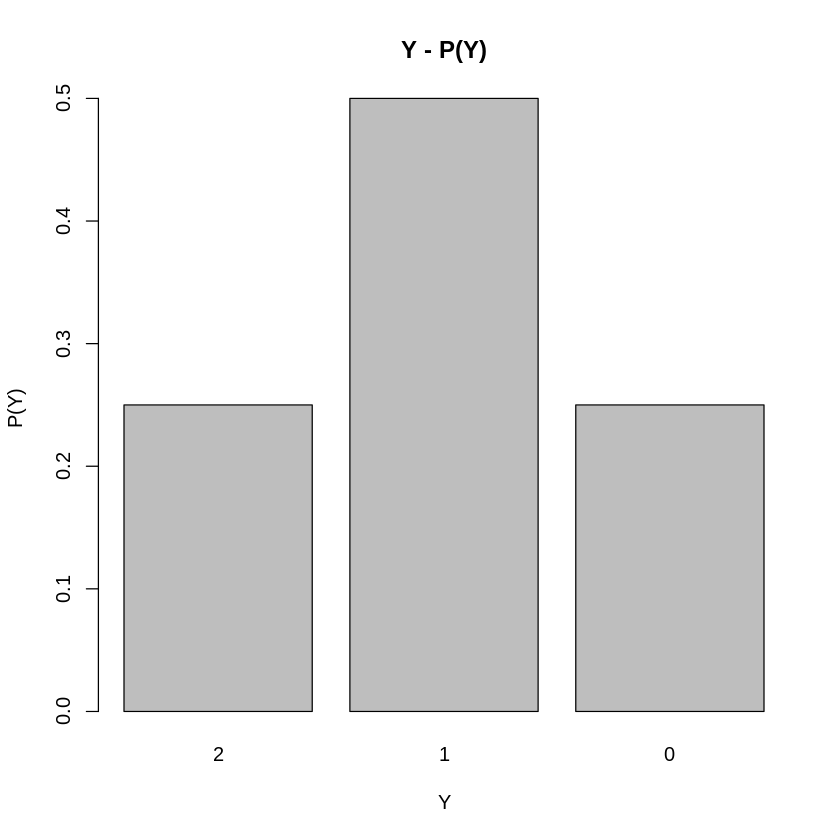

In [46]:
#si utilizamos el data frame anterior y extraemos únicamente la variable aleatoria y su
#probabilidad
y_py <- data.frame(va$y,va$py)
#removemos los duplicados
y_py <- unique(y_py[,])
colnames(y_py) <- c('y','py')
#al generar un histograma podemos darnos una idea cual es su valor esperado E(Y)
barplot(y_py$py, names = y_py$y,
        xlab = "Y", ylab = "P(Y)",
        main = "Y - P(Y)")

Con lo que podríamos decir que el valor esperado es 1. Ahora bien corroboramos esto de otra manera:

In [47]:
#vamos a generar aleatoriamente un millón de números para Y (0,1,2) con su respectiva
#probabilidad de P(Y) (0.25,0.5,0.25 respectivamente)
muestra <- sample(c(0,1,2), size = 1000000, prob = c(0.25,0.5,0.25), replace = T)
#luego procedemos a sacar la media de esta listado
mean(muestra)

[1] 0.99929

Al realizar la prueba por simulación vemos que la media de casi 1, por lo que el valor esperado debe ser 1.

In [48]:
#aplicando la fórmula de la sumatoria y*p(y) la esperanza nos queda
e <- (sum(muestra==0)*0 + sum(muestra==1)*1 + sum(muestra==2)*2)/length(muestra)
#finalmente corroboramos la esperanza 
e

[1] 0.99929

## Varianza
Si Y es una variable aleatoria con media $E(Y)=\mu$, la varianza de una variable aleatoria está dada por $(Y-\mu)^2$. Por lo tanto

\begin{align}
V(Y) = E[(Y - \mu)^2]
\end{align}

Si p(y) es una caracterización precisa de la distribución de frecuencia poblacional, entonces podemos asumir que:

\begin{align}
E(Y) & = \mu \\
V(Y) & = \sigma^2
\end{align}

Ejemplo
Supongamos que tenemos una variable aleatoria Y y sus probabilidades según la siguiente tabla:

| Y | P(Y) |
|:-:|:----:|
| 0 | 1/8  |
| 1 | 1/4  |
| 2 | 3/8  |
| 3 | 1/4  |

Si calculamos la media de la manera tradicional obtenemos que:

\begin{align}
E(Y) & = \sum_{i=0}^{3} y_i p(y_i) \\\\
E(Y) & = 0 \times \frac{1}{8} + 1 \times \frac{1}{4} + 2 \times \frac{3}{8} + 3 \times \frac{1}{4} \\\\
E(Y) & = 1.75
\end{align}

La varianza y la desviación estándar quedarían como:

\begin{align}
V(Y) & = \sum_{i=0}^{3} (y_i - \mu)^2 p(y_i) \\\\
V(Y) & = (0 - 1.75)^2 \times \frac{1}{8} + (1 - 1.75)^2 \times \frac{1}{4} + (2 - 1.75)^2 \times \frac{3}{8} + (3 - 1.75)^2 \times \frac{1}{4} \\\\
V(Y) & = 0.9375 \\\\
\sigma & = \sqrt{V(Y)} \\\\
\sigma & = 0.97
\end{align}

Ahora veamos otro perspectiva del problema:

In [50]:
#primero definimos una muestra para los valores de Y con sus probabilidades respectivas
#vamos a generar un millón de muestras y luego a realizar los cálculos respectivos
muestra <- sample(c(0,1,2,3), 1000000, prob = c(1/8,1/4,3/8,1/4), 
replace = T)
#calculamos E(Y)
print('media')
mean(muestra)
#vemos que para un millón de registros nos da 1.749 que es aproximadamente 1.75
#Ahora vamos a calcular la desviación estándar, ya que la paquetería de R
#no nos permite calcular directamente la varianza
desviacion <- sd(muestra)
#ahora para calcular la varianza elevamos al cuadrado la desviación #estándar
varianza <- desviacion^2
print('varianza')
varianza
print('desviacion estandar')
desviacion
#si analizamos los resultados la varianza nos da 0.9377 y la desviación 
#estándar nos da 0.968, estos resultados son muy similares a los de los 
#calculos anteriores

[1] "media"


[1] 1.750427

[1] "varianza"


[1] 0.9360793

[1] "desviacion estandar"


[1] 0.9675119

## Distribucion Binomial
A la observación de una secuencia de eventos independientes cuyos valores esperados son dos opciones, por ejemplo verdadero o falso, 1 o 0, Si o No, etc, se le conoce como eventos de distribución binomial, y estos eventos poseen las siguientes características:

* Consiste en un número fijo, n, de pruebas idénticas.
* Cada prueba resulta en uno de dos resultados: éxito, S, o fracaso, F.
* La probabilidad de éxito en una sola prueba es igual a algún valor p y es el mismo de una prueba a la otra. La probabilidad de fracaso es igual a $q = (1 – p)$.
* Las pruebas son independientes.
* La variable aleatoria de interés es Y, el número de éxitos observado durante las n pruebas.

Por lo tanto se dice que para una distribución binomial:

\begin{align}
p(y) = \binom{n}{y}p^yq^{n-y}
\end{align}

Esto se cumple para

\begin{align}
y = 0, 1, \dots, n \\
0 \leq p \leq 1
\end{align}

Ejemplo

Suponga que un lote de 5000 fusibles eléctricos contiene 5% de piezas defectuosas. Si se prueba una muestra de 5 fusibles, encuentre la probabilidad de hallar al menos uno defectuoso.

Para este problema tenemos que n = 5, p = 0.05 y q=0.95, entonces procedemos a calcular la probabilidad no hallar ninguno defectuoso

\begin{align}
p(0) & = \binom{5}{0}p^0q^{5-0} \\
p(0) & = 0.774
\end{align}

Con esto procedemos a calcular la probabilidad de calcular mas de uno defectuoso, que estaría dada por:

\begin{align}
p(al menos uno defectuoso) & = 1-p(0) \\
p(al menos uno defectuoso) & = 1-0.774 \\
p(al menos uno defectuoso) & = 1-0.226
\end{align}

In [51]:
#utilizando la función dbinom procedemos a calcular la probabilidad 
#de encontrar 0 errores o p(0)
p0 <- dbinom(0,5,0.05)
#luego para calcular que exista al menos uno debemos calcular 1 - p(0)
p_almenos_uno <- 1 - p0
print('probabilidad de al menos uno')
p_almenos_uno
#vemos que el resultado es 0.226 así como lo habíamos calculado 
#ahora veamos qué pasa cuando lo calculamos a través de la 
#función acumulada
p_almenos_uno_ <- pbinom(1,5,0.05, lower.tail = F)
print('probabilidad acumulada de al menos uno')
p_almenos_uno_
#vemos que la distribución acumulada nos devuelve 0.2259
#un valor bastante cercano a la aproximación inicial

[1] "probabilidad de al menos uno"


[1] 0.2262191

[1] "probabilidad acumulada de al menos uno"


[1] 0.0225925

## Distribucion Geometrica
La distribución de probabilidad geométrica comparte muchas similitudes con la distribución de probabilidad binomial, ambas se basan en resultados con dos opciones, 1 ó 0, verdadero o falso, sí o no, y comparten las mismas características, la diferencia principal es que la distribución binomial se basa en la cantidad de éxitos que existen en n pruebas, mientras que la distribución geométrica la variable aleatoria Y se basa en el número de prueba en el que se encuentra el primer éxito. 

Se dice entonces que la funcion de distribucion de probabilidades de una distribución geométrica está dada por:

\begin{align}
p(y) & = q^{y-1}p
\end{align}

Donde,

\begin{align}
y = 1,2,3, \dots, n
0 \leq p \leq 1
\end{align}

Ejemplo
Suponga que la probabilidad de mal funcionamiento de un motor durante cualquier periodo de una hora es p = .02. Encuentre la probabilidad de que un motor determinado funcione bien dos horas.

Sea Y el número de horas en las que funciona bien un motor, entonces

\begin{align}
P(funcione bien dos horas) = P(y \geq 3)
\end{align}

Entonces,

\begin{align}
P(y \geq 3) & = 1 - \sum_{i=1}^{2}P(y_i) \\\\
P(1) & = p \\\\
P(2) & = qp \\\\
P(y \geq 3) & = 1 - (p + qp) \\\\
P(y \geq 3) & = 1 - (0.2 + 0.98 \times 0.2) \\\\
P(y \geq 3) & = 0.9604
\end{align}

In [52]:
#Utilizando la función dgeom, vamos a calcular p(1)
#tome nota que el primer parámetro de la función es y-1
#por lo que para y=1 el primer parámetro es 0
p1 <- dgeom(0,0.02)
#luego calculamos p(2)
p2 <- dgeom(1,0.02)
#y finalmente para calcular p(y>=3)=1-p(1)-p(2)
p_mayor_igual_3 <- 1-p1-p2
print('probablidad para y >= 3')
p_mayor_igual_3
#vemos que el resultado es 0.9604
#ahora bien si lo calculamos mediante la distribución acumulada
#tomando en cuenta la acumulada para p(2) y nuevamente
#el primer parámetro es y-1
print('probablidad para y >= 3')
pgeom(1, 0.02, lower.tail = F)
#como vemos obtenemos el mismo resultado que con el cálculo anterior

[1] "probablidad para y >= 3"


[1] 0.9604

[1] "probablidad para y >= 3"


[1] 0.9604

## Distribucion de Poisson
La distribución de Poisson es un modelo para brindar probabilidades cuando la variable aleatorio Y ocurren en eventos raros que se dan en un espacio de tiempo, donde se define a  como el valor promedio de Y. Por lo tanto una distribución de Poisson esta data por:

\begin{align}
p(y) = \frac{\lambda^y}{y!}\mathrm{e}^{-\lambda}
\end{align}

Donde,

\begin{align}
y & = 0,1,2,\dots,n \\\\
\lambda & > 0
\end{align}

Ejemplo
Suponga que se diseña un sistema aleatorio de patrulla de policía para que un oficial de patrulla pueda estar en un lugar de su ruta $Y = 0, 1, 2, 3, \dots$ veces por periodo de media hora, con cada lugar visitado un promedio de una vez por periodo. Suponga que Y posee, aproximadamente, una distribución de probabilidad de Poisson. Calcule la probabilidad de que el oficial de patrulla no llegue a un lugar determinado durante un periodo de media hora. ¿Cuál es la probabilidad de que el lugar sea visitado una vez? ¿Dos veces? ¿Al menos una vez?

Para este ejemplo tomamos que $\lambda=1$ dado que el periodo medio es media hora y la tasa de llegada es de 1, por lo tanto

\begin{align}
p(y) & = \frac{1^y\mathrm{e}^{-1}}{y!} \\\\
p(y) & = \frac{\mathrm{e}^{-1}}{y!}
\end{align}

La probabilidad de que el lugar no sea visitado esta dado por p(0), por lo tanto

\begin{align}
p(y) & = \frac{\mathrm{e}^{-1}}{0!} \\\\
p(y) & = 0.368
\end{align}

Por lo tanto, que el lugar sea visitado al menos una vez está dado por

\begin{align}
p(Y \geq 1) & = 1- p(0) \\\\
p(Y \geq 1) & = 0.632
\end{align}

In [54]:
#En R podemos utilizar la función dpois, donde el primer parámetro es
#y y el segundo parámetro es lambda, por lo tanto 
p0 <- dpois(0,1)
#finalmente p >= 1 esta dado por 
print('probabilidad 1-p(0)')
1-p0
#que esto nos devuelve 0.6321206
#ahora bien utilizando la función de distribución acumulada podemos 
#calcularlo de esta manera
print('probabilidad acumulada')
ppois(0,1,lower.tail = F)
#que al calcularlo nos devuelve exactamente el mismo resultado

[1] "probabilidad 1-p(0)"


[1] 0.6321206

[1] "probabilidad acumulada"


[1] 0.6321206

## Variables Aleatorias Continuas
Hemos estudiado variables aleatorias sobre eventos discretos, como la combinación de dos monedas o el lanzamiento de un dado, pero qué sucede cuando nuestros eventos son la cantidad de lluvia que cae en espacio determinado, en este tipo de eventos se podría decir que la variable aleatoria puede tener valores entre 0 a N mililitros de agua, lo cual vemos que es un evento de valores continuos donde $N \in \mathbb{R}$, es aquí donde las funciones de probabilidades toman otro sentido completamente.

Por lo tanto una variable aleatoria Y con función de distribución F(y) se dice que es continua si F(y) es continua para $-\infty<y<\infty$.

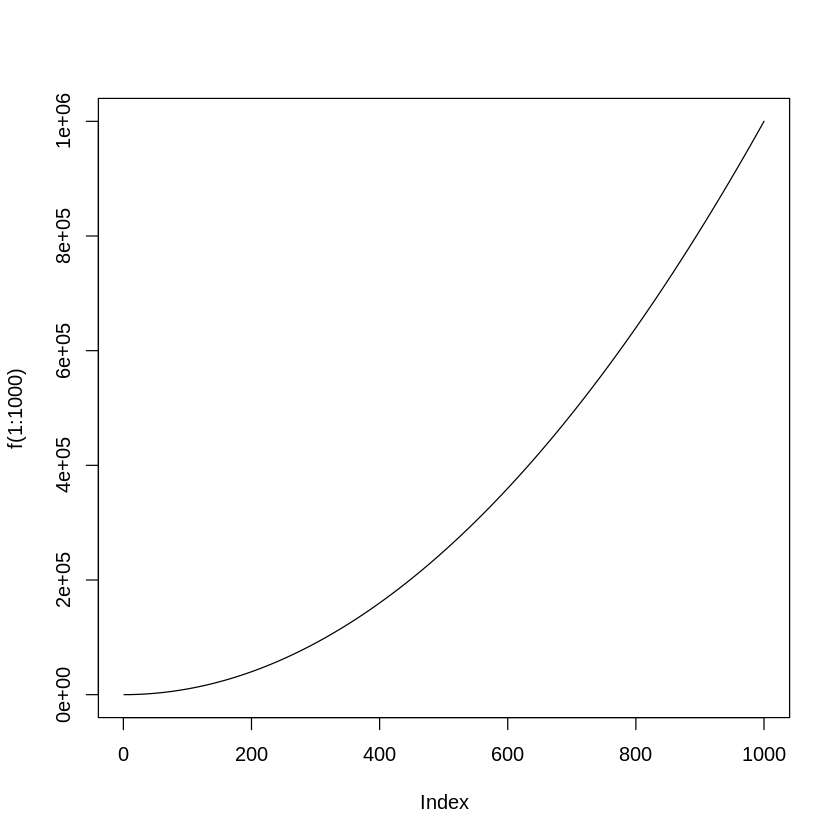

In [1]:
#definimos una función x^2
f <- function(x){x^2}
#procedemos a graficar dicha función en un intervalo de 1 a 1000
plot(f(1:1000), type='l')

Sea F(y) la función de distribución para una variable aleatoria continua Y. Entonces f(y), dada por:

\begin{align}
f(y) = \frac{\partial F(y)}{\partial y}
\end{align}

Por lo que podemos decir entonces:
\begin{align}
F(y) = \int_{-\infty}^{y}f(t)\partial t
\end{align}

Por lo tanto las funciones de densidad tienen las siguientes características:

* $f(y) \geq 0$ para toda $y, -\infty < y < \infty$

* $\int_{-\infty}^{\infty} f(y) \partial y = 1$

Ejemplo

Para el intervalo $0 \geq x \geq 2$, compruebe que $f(x)=\frac{3}{8}x^2$ es una función de densidad válida.

In [2]:
#primero vamos a definir nuestra función de densidad
f <- function(x){
  (3/8)*x^2
}
#probamos nuestra función
f(2)
#vemos lo sencillo que es definir una función en R
#ahora para comprobar que f(x) es una función de densidad
#para el intervalo 0<x<2 debemos integrar y evaluar para dicho
#intervalo, para ello utilizamos la función integrate
integrate(f,0,2)
#como vemos esta función nos pide la función y los límites
#superior e inferior, la respuesta que nos devuelve es 1
#con un error absoluto de 1.1e-14

[1] 1.5

1 with absolute error < 1.1e-14

Ejemplo

Sea Y una variable aleatoria continua con función de densidad de probabilidad dada por

\begin{align}
f(x) = \begin{cases}
    3x^2, &\quad 0 \leq y \leq 2 \\
    0, &\quad\text{en cualquier otro punto}\\
    \end{cases}
\end{align}

Encuentre F(y). Grafique f(y) y F(y)

[1] "f(0)"


[1] 0

[1] "f(0.5)"


[1] 0.75

[1] "f(1)"


[1] 3

[1] "f(2)"


[1] 0

[1] "integral de f(0,1)"


1 with absolute error < 1.1e-14

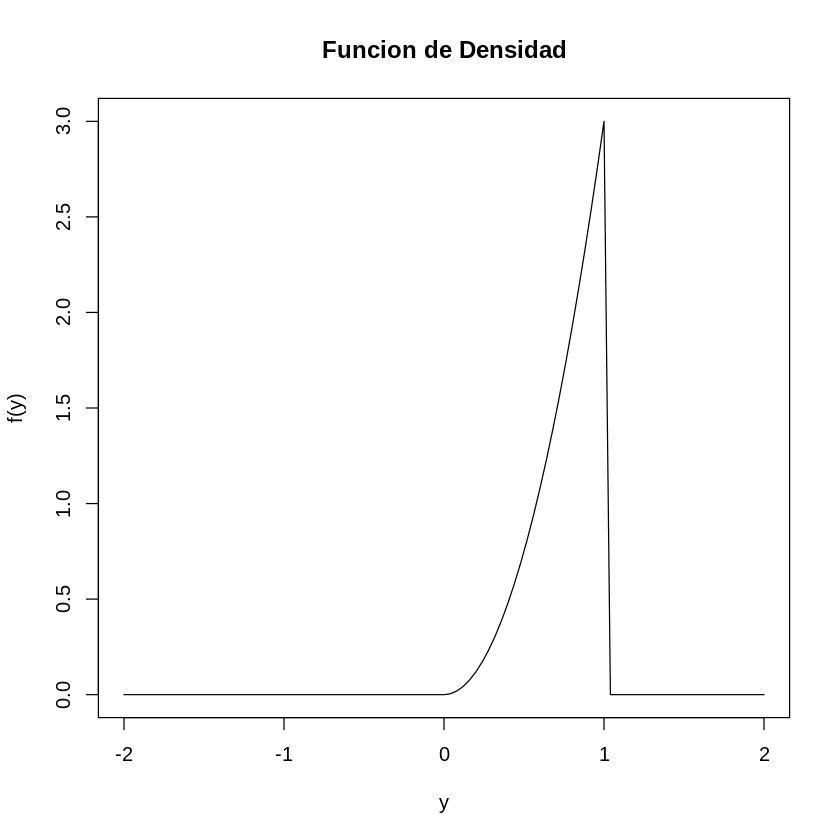

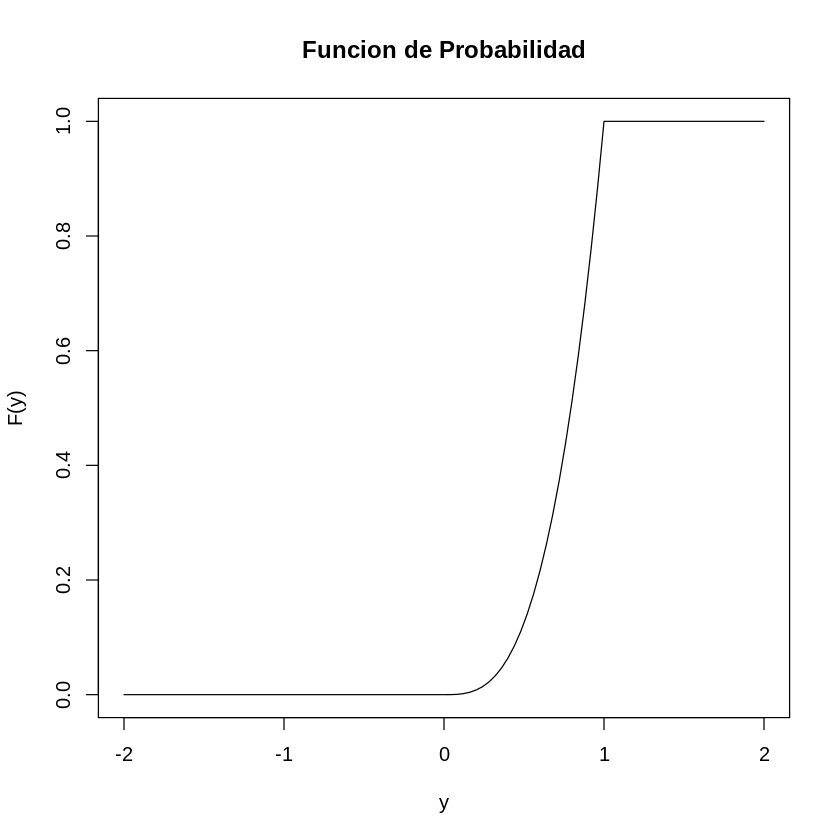

In [4]:
#primero definimos la función de densidad
f <- function(y){
  ifelse(y >= 0 & y <= 1, 3*y^2, 0)
}
#nótese que utilizamos un if donde si 0 < y < 1 devuelve 3y^2 y 0 para 
#cualquier otro caso, ahora probemos que nuestra función es correcta
print('f(0)')
f(0)
print('f(0.5)')
f(0.5)
print('f(1)')
f(1)
print('f(2)')
f(2)
#una vez validad nuestra función procedamos a validar si es una 
#función de densidad válida, esto utilizando el comando de 
#integracion
print('integral de f(0,1)')
integrate(f,0,1)
#vemos que devuelve 1 por lo que podemos proseguir
#ahora definimos F que estará definida fprob por facilidad
fprob <- function(y){
  ifelse(y >= 0 & y <= 1, y^3,ifelse(y>1,1,0))
}
#como sabemos que la integral de 3y^2 = y^3 definimos la función
#en los mismo intervalos de la función de densidad
#ahora vamos a graficar f(y)
plot(f,-2,2, type='l', main='Funcion de Densidad', xlab='y', ylab='f(y)')
#esto nos genera la gráfica del intervalo -2 a 2 para que veamos la 
#diferencia en la curva
#ahora procedemos a graficar F(y)
plot(fprob,-2,2, type='l', main='Funcion de Probabilidad', xlab='y', ylab='F(y)')

Como vemos ambas gráficas son muy similares dado los intervalos, siendo la gráfica de F(y) ligeramente más pronunciada que la de f(y). Nótese que para F(y) su valor es 1 para cualquier valor mayor que 1 ya que se trata de una función acumulada de probabilidad.

## Valor Esperado
Ya hemos definido el valor esperado para variables aleatorias discretas, la cual es:

\begin{align}
E(Y) = \sum_{y}yp(y)
\end{align}

Para el caso de las variables aleatorias continuas es:

\begin{align}
E(Y) = \int_{-\infty}^{\infty}yp(y)
\end{align}

Siempre que la integral exista. Así mismo se puede definir que:
\begin{align}
V(Y) = E(y - \mu)^2
\end{align}

Lo que es lo mismo a:
\begin{align}
V(Y) = E(Y^2) - \mu^2
\end{align}

Ejemplo
Para el intervalo $0 \leq y \leq 2$ y la función de densidad $f(y)= \frac{3}{8}y^2$, encuentre E(Y) y V(Y)

In [6]:
#nuevamente iniciamos con nuestra función de densidad
f <- function(y){
  ifelse(y >=0 & y <= 2, (3/8)*y^2,0 )
}
#ahora definimos nuestra función de valor esperado como y*f(y)
f_esperado <- function(y){
  ifelse(y >=0 & y <= 2, y*f(y),0 )
}
#utilizamos $val para obtener el valor numérico de la integral
esperado <- integrate(f_esperado,0,2)$val
#con esto vemos que E(y)=1.5
print('Esperado:')
esperado
#ahora como la varianza es igual a E(y^2) - E(y)^2
#debemos calcular primero E(y^2) para ello definimos la función
#para luego integrar
f_e_cuadrado <- function(y){
  (y^2)*f(y)
}
e_cuadrado <- integrate(f_e_cuadrado,0,2)$val
#finalmente calculamos la varianza
varianza <- e_cuadrado - (esperado^2)
print('varianza:')
varianza
#esto nos devuelve que V(Y) = 0.15

[1] "Esperado:"


[1] 1.5

[1] "varianza:"


[1] 0.15

## Distribucion Normal
Se dice que una variable Y tiene una distribución normal de probabilidad si y sólo si para $\sigma>0$y $-\infty<\mu<\infty$, la función de densidad de Y es:

\begin{align}
f(y) = \frac{1}{\sigma \sqrt{\prod}}\mathrm{e}^{\frac{-(y-\mu)^2}{2\sigma^2}}
\end{align}

Ejemplo
Denote con Z una variable aleatoria normal con media 0 y desviación estándar de 1, encuentre:

1. $P(Z >2)$
2. $P(-2 \leq Z \leq 2)$
3. $P(0 \leq Z \leq 1.73)$

In [8]:
#1 para z>2 usamos pnorm como distribución acumulada
print('1.')
pnorm(2, mean=0, sd=1, lower.tail=FALSE) 
#el resultado nos da 0.02275

#2 Para -2<Z<2 primero calculamos pnorm para -2 utilizando
#el corrimiento de acumulado hacia la izquierda
#porque lo que lower.tail = True
#luego calculamos para 2 y esto nos da las cuotas que 
#queremos excluir por lo que la probabilidad está dada por
print('2.')
1-pnorm(-2, mean=0, sd=1, lower.tail=TRUE)- pnorm(2, mean=0, sd=1, lower.tail=FALSE)
#esto nos devuelve 0.9544

#3 para 0<Z<1.73 es el mismo escenario que el inciso 2 por lo que
print('3.')
1-pnorm(0, mean=0, sd=1, lower.tail=TRUE)- pnorm(1.73, mean=0, sd=1, lower.tail=FALSE)
#el resultado es 0.4581849

[1] "1."


[1] 0.02275013

[1] "2."


[1] 0.9544997

[1] "3."


[1] 0.4581849